# Pythia

## plain Pythia

In [2]:
import pandas
import numpy
from copy import deepcopy

In [3]:
esmif_df = pandas.read_csv("pythia_all_train.csv").rename(str.lower, axis=1) #.drop(["Unnamed: 0"], axis=1)
esmif_df['experimental'] = True
esmif_df

,name,ddg,pythiascore,experimental
0,1a23_H_32_L,5.30,2.005835,True
1,1a23_H_32_S,5.20,-0.754283,True
2,1a23_H_32_Y,6.80,1.915074,True
3,1a43_C_71_S,-3.70,-12.047657,True
4,1a43_E_12_D,-4.55,-9.378929,True
...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True
3314,5pti_Y_35_D,-3.80,-11.602140,True
3315,5pti_Y_35_F,-0.60,-0.648102,True
3316,5pti_Y_35_G,-5.00,-12.547439,True


In [4]:
def go_to_my_format(x):
    for _v, _k in zip(
        x["name"].split("_"), ["pdb_code", "from_aa", "position", "to_aa"]
    ):
        x[_k] = _v
    return x

In [5]:
esmif_df=esmif_df.apply(lambda x: go_to_my_format(x), axis=1)
esmif_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True,5pti,Y,35,A
3314,5pti_Y_35_D,-3.80,-11.602140,True,5pti,Y,35,D
3315,5pti_Y_35_F,-0.60,-0.648102,True,5pti,Y,35,F
3316,5pti_Y_35_G,-5.00,-12.547439,True,5pti,Y,35,G


,ddg,pythiascore
ddg,1.000000,0.528188
pythiascore,0.528188,1.000000


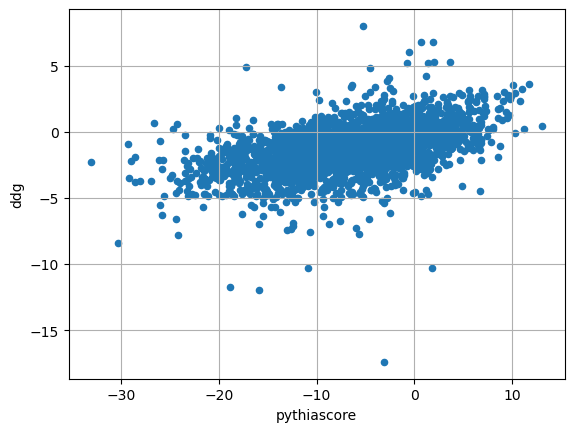

In [6]:
plain_esmif_plot= esmif_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
esmif_df[["ddg", "pythiascore"]].corr()

In [7]:
zegroups=esmif_df.groupby(['pdb_code','position','from_aa']).groups
zegroups

{('1a23', '32', 'H'): [0, 1, 2], ('1a43', '12', 'E'): [4], ('1a43', '20', 'R'): [6], ('1a43', '37', 'W'): [7], ('1a43', '71', 'C'): [3], ('1a43', '9', 'G'): [5], ('1a5e', '121', 'L'): [8], ('1a5e', '15', 'W'): [10], ('1a5e', '37', 'L'): [9], ('1aar', '27', 'K'): [14], ('1aar', '29', 'K'): [15, 16], ('1aar', '42', 'R'): [19], ('1aar', '45', 'F'): [11], ('1aar', '6', 'K'): [17, 18], ('1aar', '68', 'H'): [12, 13], ('1aar', '72', 'R'): [20], ('1aep', '132', 'A'): [21], ('1aep', '136', 'T'): [23], ('1aep', '23', 'T'): [24], ('1aep', '9', 'L'): [22], ('1ag2', '52', 'F'): [26], ('1ag2', '57', 'V'): [33], ('1ag2', '6', 'M'): [28], ('1ag2', '60', 'T'): [31], ('1ag2', '67', 'T'): [32], ('1ag2', '75', 'F'): [27], ('1ag2', '77', 'E'): [25], ('1ag2', '85', 'R'): [30], ('1ag2', '87', 'V'): [34], ('1ag2', '94', 'Q'): [29], ('1aj3', '1', 'H'): [52, 53], ('1aj3', '12', 'S'): [89, 90], ('1aj3', '13', 'W'): [96], ('1aj3', '14', 'I'): [56, 57], ('1aj3', '16', 'E'): [46, 47], ('1aj3', '17', 'K'): [62], ('1

In [8]:
_=zegroups[list(zegroups.keys())[1]]
#_=zegroups[list(zegroups.values())[0]]
testgroup=esmif_df.loc[_]
_, len(_) #testgroup

(Index([4], dtype='int64'), 1)

In [9]:
def augment_single(group):
    testme = deepcopy(group)
    # if len(testme) == 1:
    #    return [dict(testme.iloc[0])]
    testme_aug = []  # pandas.DataFrame() #columns=testme.columns)
    # testme_aug
    _ddg = dict(zip(testme["to_aa"], testme["ddg"]))
    _ll = dict(zip(testme["to_aa"], testme["ll_mut"]))
    _aa = list(_ddg.keys())
    _orig_aa = testme.iloc[0]["from_aa"]
    # print(_orig_aa, _ddg, _aa, _ll)
    # dict(testme.iloc[0])

    while _aa:
        _aug_from = _aa.pop()
        for _ in _aa:
            _aug = dict(testme.iloc[0])
            _aug["from_aa"] = _aug_from
            _aug["to_aa"] = _
            _aug["ll_native"] = _ll[_aug_from]
            _aug["ll_mut"] = _ll[_]
            _aug["delta"] = _aug["ll_mut"] - _aug["ll_native"]
            _aug["ddg"] = _ddg[_] - _ddg[_aug_from]
            _aug["experimental"] = False
            testme_aug.append(_aug)
    return testme_aug

In [10]:
def anti(x):
    #_anti = deepcopy(x)
    x['to_aa'], x['from_aa']  =  x['from_aa'], x['to_aa']
    #x['ll_mut'], x['ll_native']  =  x['ll_native'], x['ll_mut']
    x['ddg'] = -x['ddg']
    x['pythiascore'] = -x['pythiascore']
    x['experimental'] = False
    return x

anti_df = deepcopy(esmif_df).apply(anti, axis=1)

In [11]:
anti_df.shape

(3318, 8)

In [12]:
double_df = pandas.concat([esmif_df,anti_df],ignore_index=True)
assert len(double_df) == 2* len(esmif_df)
double_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y


,ddg,pythiascore
ddg,1.00000,0.68772
pythiascore,0.68772,1.00000


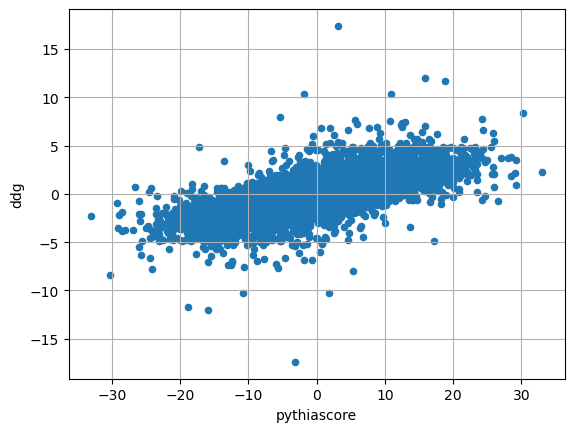

In [13]:
plain_double_plot= double_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
double_df[["ddg", "pythiascore"]].corr()

In [15]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(double_df['ddg'],double_df['pythiascore']))

7.362956118982477

## ddFEP

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
X = double_df["pythiascore"].to_numpy().reshape(-1, 1)
y = double_df["ddg"].to_numpy()
#wgt = double_df["wgt"].to_numpy()
X.shape, y.shape #wgt.shape

((6636, 1), (6636,))

In [18]:
lin = LinearRegression(fit_intercept=True).fit(
    X,
    y,
    #sample_weight=wgt
)

In [19]:
import math

lin.coef_, lin.intercept_, math.sqrt(lin.score(X, y))

(array([0.1585021]), 0.0, 0.6877197827443696)

In [20]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [21]:
#esmif_df.head()
def kd_delta(x):
    x['kd_delta']=kd[x['from_aa']] - kd[x['to_aa']]
    return x
ddfep_df = double_df.apply(kd_delta, 
               axis='columns'
              )

In [22]:
ddfep_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,kd_delta
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,-7.0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,-2.4
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,-1.9
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,3.3
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0.0
...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,3.1
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,-2.2
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,4.1
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0.9


In [23]:
X_fep= ddfep_df[['pythiascore','kd_delta']].to_numpy()

In [24]:
ddfep_model = LinearRegression(fit_intercept=True).fit(
    X_fep,
    y,
    #sample_weight=wgt
)

In [25]:
ddfep_model.coef_, ddfep_model.intercept_, math.sqrt(ddfep_model.score(X_fep, y))

(array([ 0.15786294, -0.04660186]), 0.0, 0.6927447887319114)

In [26]:
ddfep_df['ddfep']=ddfep_model.predict(X_fep)

1.4264233156165431

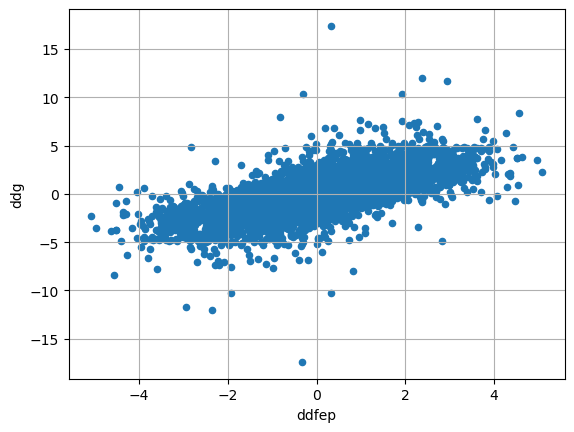

In [27]:
ddfep_plot= ddfep_df.plot.scatter(x='ddfep',y='ddg', grid=True)

math.sqrt(mean_squared_error(ddfep_df['ddg'],ddfep_df['ddfep']))

In [28]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_fep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_fep, y > 0))
rsq

array([0.53934368, 0.47119397, 0.46844426, 0.46457129, 0.45421092,
       0.53438645, 0.46544682, 0.46513889, 0.38880131, 0.54311422,
       0.4597863 , 0.4451257 , 0.47691455, 0.49868836, 0.5198369 ,
       0.47428918, 0.49643437, 0.4528917 , 0.48320252, 0.49204893,
       0.48333371, 0.52330422, 0.49082974, 0.40185256, 0.49978061,
       0.494044  , 0.44253787, 0.4488627 , 0.50879815, 0.50381943,
       0.52813127, 0.45147118, 0.4984014 , 0.46890601, 0.44758839,
       0.49997656, 0.5256633 , 0.4449311 , 0.46927128, 0.4622719 ,
       0.52717884, 0.5233063 , 0.4423889 , 0.45407636, 0.45368856,
       0.45744401, 0.48638323, 0.47507355, 0.49783622, 0.47782884])

In [29]:
math.sqrt(rsq.mean())

0.6925727473639103

In [30]:
sum([math.sqrt(_) for _ in rsq])/len(rsq)


0.6921609182212767

## ddFEP w. optimized aa. DG(aq)

In [31]:
ddfep_opt = deepcopy(double_df)
for _ in sorted(kd.keys()):
    ddfep_opt[_] = 0
ddfep_opt

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [33]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')

In [34]:
### fit test

In [35]:
X_optfep= ddfep_opt[['pythiascore']+sorted(kd.keys())].to_numpy()
X_optfep.shape

(6636, 21)

In [36]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [37]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([ 0.14482661, -0.37418751,  0.27896217, -0.58849571, -0.25047661,
         0.44999147, -0.72959189, -0.06261135,  0.54938204, -0.41624436,
         0.33285861,  0.73166655, -0.42678213, -0.26697308, -0.39263795,
         0.30593624, -0.54498475, -0.49387366,  0.08891944,  1.06344073,
         0.74570174]),
 0.0,
 0.7442619043076333)

In [38]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

In [39]:
#ddfep_opt[["name", "ddg", "pythiascore", "ddfep_opt"]].rename(
#    {"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv("pythia_ddmbc_train.csv")

1.3210115621219487

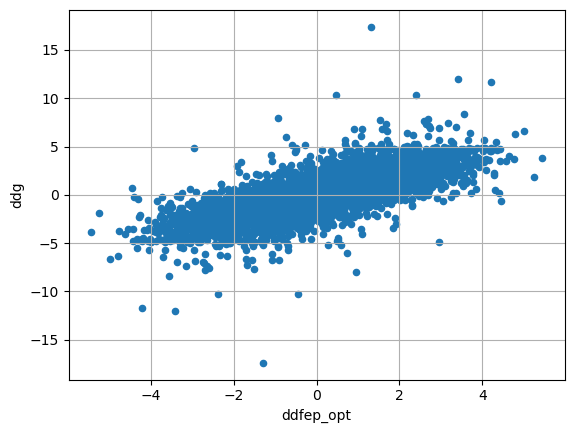

In [40]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt']))

In [41]:
ddfep_opt[['ddg','ddfep_opt']].corr()

,ddg,ddfep_opt
ddg,1.000000,0.744262
ddfep_opt,0.744262,1.000000


#### compare w. Kyte-Doolittle

In [42]:
scales =pandas.DataFrame( {'ddFEP Scale': dd_optfep_model.coef_[1:]}, index=sorted(kd.keys()))
scales['KD']=kd
scales

,ddFEP Scale,KD
A,-0.374188,1.8
C,0.278962,2.5
D,-0.588496,-3.5
E,-0.250477,-3.5
F,0.449991,2.8
G,-0.729592,-0.4
H,-0.062611,-3.2
I,0.549382,4.5
K,-0.416244,-3.9
L,0.332859,3.8


### Crossvalidate

In [43]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.56244325, 0.5632603 , 0.58889854, 0.51570161, 0.51210164,
       0.56359089, 0.55947381, 0.5569598 , 0.55806493, 0.51294588,
       0.57086013, 0.58877726, 0.53587789, 0.50204488, 0.55422794,
       0.50149149, 0.57081879, 0.53028811, 0.56201449, 0.59187308,
       0.51742687, 0.57287858, 0.59054103, 0.49062156, 0.59251647,
       0.5522285 , 0.53962069, 0.56096693, 0.54917997, 0.5479637 ,
       0.57593925, 0.50628089, 0.49429879, 0.59237623, 0.59344372,
       0.5981423 , 0.56957586, 0.52707172, 0.52315346, 0.53830988,
       0.5483362 , 0.5353391 , 0.56081863, 0.52256757, 0.58121605,
       0.55761654, 0.54191276, 0.50653334, 0.57626551, 0.57370784])

In [44]:
numpy.sqrt(optfep_rsq).mean(), numpy.sqrt(optfep_rsq).std()

(0.7418722067939627, 0.019922912047194354)

In [45]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.7418722067939627

## Test on S669

In [46]:
esmif_s669_df = (
    pandas.read_csv("pythia_s669_augd.csv", index_col=None)
    .rename(str.lower, axis=1)
    .apply(lambda x: go_to_my_format(x), axis=1)
)
#esmif_s669_df['experimental']=True
esmif_s669_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H
...,...,...,...,...,...,...,...
664,5jxb_D_25_P,-1.440,-5.337091,5jxb,D,25,P
665,5oaq_Y_199_H,-2.990,-13.397189,5oaq,Y,199,H
666,5vp3_S_128_G,-0.378,-8.731921,5vp3,S,128,G
667,5vp3_V_183_T,0.354,-3.005847,5vp3,V,183,T


In [47]:
s669_in=pandas.read_csv('s669_pythia_in.csv').drop(['Unnamed: 0'], axis=1)
s669_in

,pdb,mut_format,ddg,chain,wildtype,resseq,mutation
0,1a0f,SA11A,-1.800,A,S,11,A
1,1a7v,AA104H,-2.690,A,A,104,H
2,1a7v,KA13H,-0.600,A,K,13,H
3,1a7v,KA20H,-2.880,A,K,20,H
4,1a7v,DA3H,-1.360,A,D,3,H
...,...,...,...,...,...,...,...
664,5jxb,DA329P,-1.440,A,D,329,P
665,5oaq,YA429H,-2.990,A,Y,429,H
666,5vp3,SA128G,-0.378,A,S,128,G
667,5vp3,VA183T,0.354,A,V,183,T


In [48]:
esmif_s669_df['chain']=s669_in['chain']

In [49]:
esmif_s669_rev_df = deepcopy(esmif_s669_df).apply(anti, axis=1)
esmif_s669_df['experimental']=True
esmif_s669_rev_df['experimental']=False
esmif_s669_df.shape, esmif_s669_rev_df.shape

((669, 9), (669, 9))

In [50]:
esmif_s669_sym_df= pandas.concat([ esmif_s669_df, esmif_s669_rev_df], ignore_index=True)
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True
...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False


In [51]:
for _ in sorted(kd.keys()):
    esmif_s669_sym_df[_] = 0
esmif_s669_sym_df= esmif_s669_sym_df.apply(encode_mutation, axis='columns')
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental,A,...,M,N,P,Q,R,S,T,V,W,Y
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True,1,...,0,0,0,0,0,-1,0,0,0,0
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True,-1,...,0,0,0,0,0,0,0,0,0,0
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False,0,...,0,0,-1,0,0,0,0,0,0,0
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False,0,...,0,0,0,0,0,0,0,0,0,1
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False,0,...,0,0,0,0,0,1,0,0,0,0
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False,0,...,0,0,0,0,0,0,-1,1,0,0


In [52]:
X_s669=esmif_s669_sym_df[['pythiascore']+sorted(kd.keys())].to_numpy()
#y_s669_af=esmif_af_df['ddg'].to_numpy()

In [53]:
esmif_s669_sym_df['ddfep_opt']=dd_optfep_model.predict(X_s669)

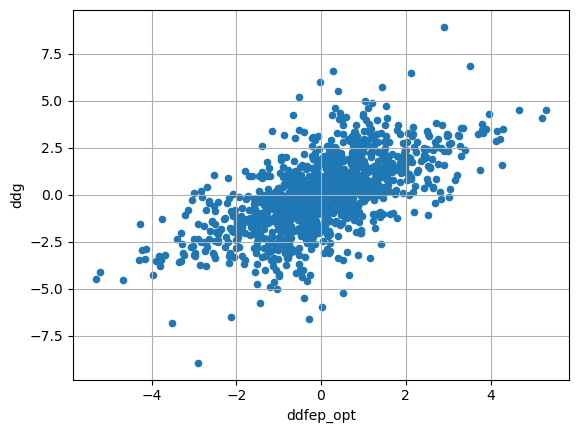

In [54]:
esmif_s669_sym_plot = esmif_s669_sym_df.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

In [55]:
#esmif_s669_sym_df.rename({"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv('pythia_test_pdb.csv')

In [56]:
math.sqrt(mean_squared_error(esmif_s669_sym_df['ddg'],esmif_s669_sym_df['ddfep_opt']))

1.4819682406985377

In [57]:
esmif_s669_sym_df[['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.631811,0.561723
ddfep_opt,0.631811,1.000000,0.907122
pythiascore,0.561723,0.907122,1.000000


### experimental only

,ddg,ddfep_opt
ddg,1.000000,0.465435
ddfep_opt,0.465435,1.000000


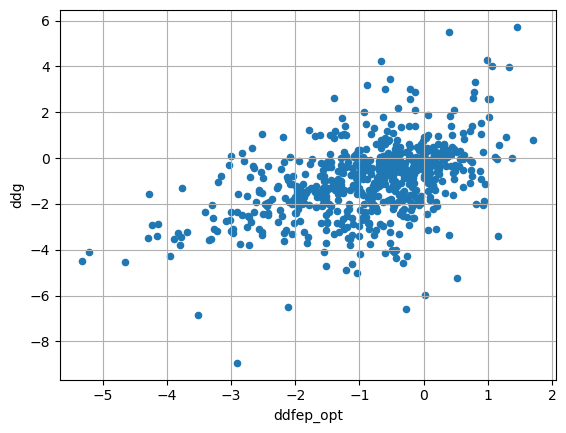

In [58]:
# parts
exp_filter=(esmif_s669_sym_df['experimental'] == True)
rev_filter=(esmif_s669_sym_df['experimental'] == False)
esmif_s669_exp_plot = esmif_s669_sym_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']].corr())
#display(esmif_s669_sym_df[(rev_filter)][['ddg','ddfep_opt']].corr


In [59]:
_ef=esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']]
math.sqrt(mean_squared_error(_ef['ddg'],_ef['ddfep_opt']))

1.4819682406985377

In [92]:
# only esmi-if
esmif_s669_df[['ddg','pythiascore']].corr()
math.sqrt(mean_squared_error(esmif_s669_df['ddg'],esmif_s669_df['pythiascore']))

7.160282560953511

### S669: Alphafold models w. pdb correction

In [61]:
s669_af = (
    pandas.read_csv("pythia_s669_af.csv")
    .rename(str.lower,axis=1)
    .apply(lambda x: go_to_my_format(x), axis=1)
)
s669_af['experimental']=True
_af_anti= s669_af.apply(anti,axis=1)
_af_anti['experimental']=False
s669_af=pandas.concat([s669_af,_af_anti], ignore_index=True)
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True
...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False


In [62]:
for _ in sorted(kd.keys()):
    s669_af[_] = 0
s669_af= s669_af.apply(encode_mutation, axis='columns')
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,1,0,...,0,0,0,0,0,-1,0,0,0,0
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True,-1,0,...,0,0,0,0,0,0,0,0,0,0
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,0,0,...,0,0,-1,0,0,0,0,0,0,0
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False,0,0,...,0,0,0,0,0,0,0,0,0,1
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False,0,0,...,0,0,0,0,1,0,0,0,0,0
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False,0,0,...,0,0,0,0,0,1,0,0,0,0


In [63]:
X_s669_af=s669_af[['pythiascore']+sorted(kd.keys())].to_numpy()
#y_s669_af=esmif_af_df['ddg'].to_numpy()

In [64]:
s669_af['ddfep_opt']=dd_optfep_model.predict(X_s669_af)

In [65]:
#s669_af.rename({"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv('pythia_af_test.csv')

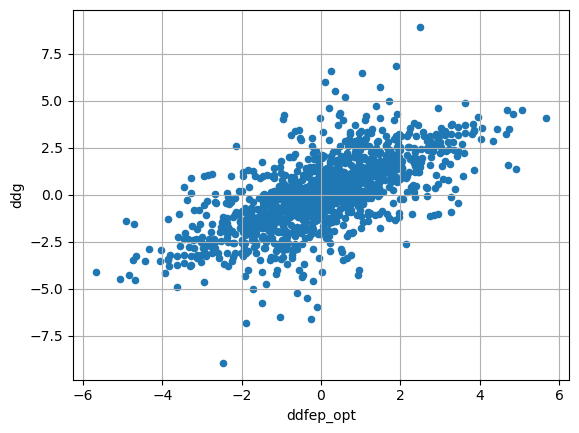

In [66]:
s669_af_plot = s669_af.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

In [67]:
math.sqrt(mean_squared_error(s669_af['ddg'],s669_af['ddfep_opt']))

1.4666272392260553

In [93]:
s669_af[['ddg','ddfep_opt','pythiascore']].corr()
math.sqrt(mean_squared_error(s669_af['ddg'],s669_af['pythiascore']))

8.348845465217211

In [69]:
s669_af[s669_af['experimental'] == True][['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.504531,0.431051
ddfep_opt,0.504531,1.000000,0.882669
pythiascore,0.431051,0.882669,1.000000


## S461 

In [70]:
#esmif_s669_sym_df[esmif_s669_sym_df['s461']==True][['ddg','ddfep_opt','pythiascore']].corr()

In [71]:
s461_df=pandas.read_csv('S461.mut',sep=' ')

In [72]:
## extract mutations to simpler csv
s461_mutations = pandas.DataFrame(s461_df['ddg'])
s461_mutations['pdb_code'] = s461_df['pdb'].apply(lambda x: x[:4].lower())
s461_mutations['chain'] = s461_df['pdb'].apply(lambda x: x[-1].upper())
s461_mutations['position'] = s461_df['mut'].apply(lambda x: int(x[1:-1]))
s461_mutations['from_aa'] = s461_df['mut'].apply(lambda x: x[0].upper())
s461_mutations['to_aa'] = s461_df['mut'].apply(lambda x: x[-1].upper())
s461_mutations['name']= s461_mutations.apply(lambda x: '_'.join([ x['pdb_code'],
                                                          x['from_aa'],
                                                          str(x['position']),
                                                          x['to_aa'],
                                                         ]), axis=1)
s461_mutations

,ddg,pdb_code,chain,position,from_aa,to_aa,name
0,-1.800,1a0f,A,11,S,A,1a0f_S_11_A
1,-1.745,1ba3,A,461,H,D,1ba3_H_461_D
2,0.287,1ba3,A,489,H,D,1ba3_H_489_D
3,-0.287,1ba3,A,489,H,K,1ba3_H_489_K
4,-0.263,1ba3,A,489,H,M,1ba3_H_489_M
...,...,...,...,...,...,...,...
456,0.060,4he7,A,19,A,G,4he7_A_19_G
457,-0.460,4he7,A,19,A,K,4he7_A_19_K
458,-1.440,5jxb,A,329,D,G,5jxb_D_329_G
459,-1.440,5jxb,A,329,D,P,5jxb_D_329_P


In [73]:
esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: x['pdb_code'] in list(s461_mutations['pdb_code']), axis=1)

In [74]:
#esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: mut_hash(x) in s461_hashes,axis=1)
esmif_s461_df= esmif_s669_sym_df[esmif_s669_sym_df['s461'] == True]

### experimental

/tmp/ipykernel_3669201/3851528414.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
/tmp/ipykernel_3669201/3851528414.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr())


,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.555807,0.425031
ddfep_opt,0.555807,1.000000,0.870962
pythiascore,0.425031,0.870962,1.000000


/tmp/ipykernel_3669201/3851528414.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
/tmp/ipykernel_3669201/3851528414.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
/tmp/ipykernel_3669201/3851528414.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['pythiascore'])))
/tmp/ipykernel_3669201/3851528414.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['pythiascore'])))


RMSE(ddfep): 1.1336758015758563
RMSE(pythiascore): 7.390213195496487


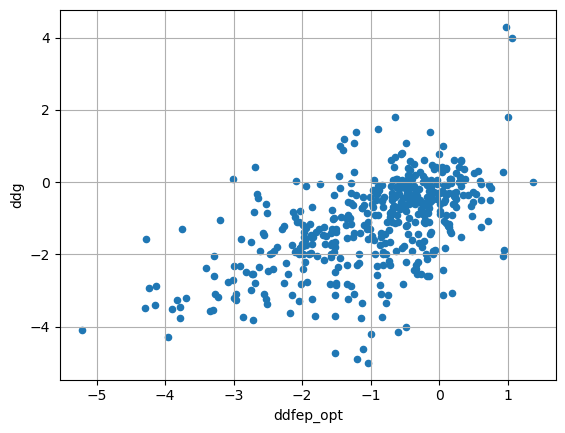

In [95]:
esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr())
print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
print('RMSE(pythiascore):', math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['pythiascore'])))

### Augmented

In [76]:
esmif_s461_df[['ddg','ddfep_opt', 'pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.752342,0.669590
ddfep_opt,0.752342,1.000000,0.924839
pythiascore,0.669590,0.924839,1.000000


### Alphafold models for 461

In [77]:
#s669_af

In [78]:
s669_af['s461']=s669_af.apply(lambda x: x['pdb_code'].lower() in list(s461_mutations['pdb_code']), axis=1)
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,A,C,...,P,Q,R,S,T,V,W,Y,ddfep_opt,s461
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,1,0,...,0,0,0,-1,0,0,0,0,-0.370952,True
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True,-1,0,...,0,0,0,0,0,0,0,0,-1.094713,False
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True,-1,0,...,0,0,0,0,0,0,0,0,0.068405,False
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True,-1,0,...,0,0,0,0,0,0,0,0,-0.471653,False
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True,0,0,...,0,0,0,0,0,0,0,0,-0.112233,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,0,0,...,-1,0,0,0,0,0,0,0,2.045193,True
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False,0,0,...,0,0,0,0,0,0,0,1,1.838712,True
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False,0,0,...,0,0,1,0,0,0,0,0,1.053073,False
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False,0,0,...,0,0,0,1,0,0,0,0,1.459259,False


In [79]:
s461_af=deepcopy(s669_af[s669_af['s461'] ==True])
s461_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,A,C,...,P,Q,R,S,T,V,W,Y,ddfep_opt,s461
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,1,0,...,0,0,0,-1,0,0,0,0,-0.370952,True
14,1BA3_H_457_D,-1.745,-4.656702,1BA3,H,457,D,True,0,0,...,0,0,0,0,0,0,0,0,-1.200299,True
15,1BA3_H_485_D,0.287,4.696040,1BA3,H,485,D,True,0,0,...,0,0,0,0,0,0,0,0,0.154227,True
16,1BA3_H_485_K,-0.287,5.389668,1BA3,H,485,K,True,0,0,...,0,0,0,0,0,0,0,0,0.426934,True
17,1BA3_H_485_M,-0.263,-3.169088,1BA3,H,485,M,True,0,0,...,0,0,0,0,0,0,0,0,0.335310,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,4HE7_A_18_G,-0.060,-0.885346,4HE7,G,18,A,False,1,0,...,0,0,0,0,0,0,0,0,0.227183,True
1323,4HE7_A_18_K,0.460,-2.194721,4HE7,K,18,A,False,1,0,...,0,0,0,0,0,0,0,0,-0.275797,True
1332,5JXB_D_25_G,1.440,1.633052,5JXB,G,25,D,False,0,0,...,0,0,0,0,0,0,0,0,0.377606,True
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,0,0,...,-1,0,0,0,0,0,0,0,2.045193,True


,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.813814,0.771950
ddfep_opt,0.813814,1.000000,0.949916
pythiascore,0.771950,0.949916,1.000000


RMSE(ddfep): 1.0414979734572245
RMSE(pythiascore): 8.698969743865858


/tmp/ipykernel_3669201/943319362.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))
/tmp/ipykernel_3669201/943319362.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))


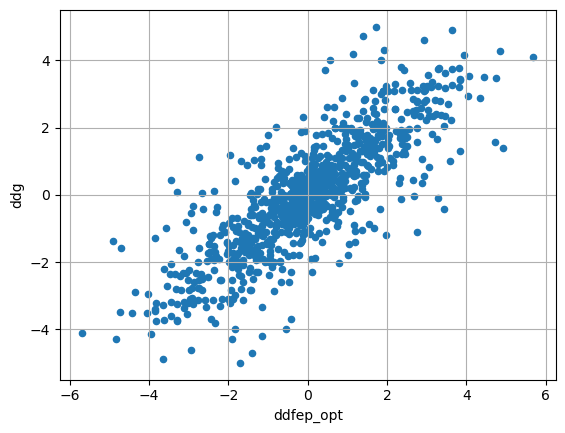

In [96]:
pythia_s461_af_plot = s461_af.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(s461_af[['ddg','ddfep_opt','pythiascore']].corr())
print('RMSE(ddfep):',math.sqrt(mean_squared_error(s461_af['ddg'],s461_af['ddfep_opt'])))
print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))

In [81]:
s461_af[s461_af['experimental']==True][['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.657579,0.577607
ddfep_opt,0.657579,1.000000,0.899876
pythiascore,0.577607,0.899876,1.000000


### Training

In [82]:
from sklearn.metrics import classification_report

In [83]:
def stabilization_class(x):
    if x > 1.0:
        return 1
    if x < -1.0:
        return -1
    return 0

states3_df=ddfep_opt[['ddg','ddfep_opt']]
states3_df.map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.680289
ddfep_opt,0.680289,1.000000


In [84]:
print(classification_report(states3_df['ddg'].map(stabilization_class),
                      states3_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.73      0.66      0.69      1713
           0       0.69      0.76      0.72      3210
           1       0.73      0.66      0.69      1713

    accuracy                           0.71      6636
   macro avg       0.72      0.69      0.70      6636
weighted avg       0.71      0.71      0.71      6636



### S669

#### experimental

In [85]:
esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.381526
ddfep_opt,0.381526,1.000000


In [86]:
print(classification_report(esmif_s669_sym_df[exp_filter]['ddg'].map(stabilization_class),
                      esmif_s669_sym_df[exp_filter]['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.70      0.57      0.63       302
           0       0.60      0.77      0.67       320
           1       0.46      0.13      0.20        47

    accuracy                           0.63       669
   macro avg       0.59      0.49      0.50       669
weighted avg       0.63      0.63      0.62       669



### S461

#### experimental

In [87]:
esmif_s461_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()

/tmp/ipykernel_3669201/3168268903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()


,ddg,ddfep_opt
ddg,1.00000,0.46637
ddfep_opt,0.46637,1.00000


In [88]:
print(classification_report(esmif_s461_df[exp_filter]['ddg'].map(stabilization_class),
                      esmif_s461_df[exp_filter]['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.77      0.64      0.70       222
           0       0.70      0.83      0.76       234
           1       0.67      0.20      0.31        10

    accuracy                           0.73       466
   macro avg       0.71      0.56      0.59       466
weighted avg       0.73      0.73      0.72       466



/tmp/ipykernel_3669201/3018456667.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(classification_report(esmif_s461_df[exp_filter]['ddg'].map(stabilization_class),
/tmp/ipykernel_3669201/3018456667.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_df[exp_filter]['ddfep_opt'].map(stabilization_class)))


#### augmented

In [89]:
esmif_s461_df[['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.676946
ddfep_opt,0.676946,1.000000


In [90]:
print(classification_report(esmif_s461_df['ddg'].map(stabilization_class),
                      esmif_s461_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.77      0.62      0.69       232
           0       0.70      0.83      0.76       468
           1       0.77      0.62      0.69       232

    accuracy                           0.73       932
   macro avg       0.75      0.69      0.71       932
weighted avg       0.73      0.73      0.72       932

